<a href="https://colab.research.google.com/github/Vaishaliii25/EDA_DA/blob/main/21BDS0043_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA LOADING

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Hitters.csv')

In [81]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


DATA INFO

In [82]:
dimensions = df.shape
print("Dimensions:", dimensions)

Dimensions: (322, 20)


In [83]:
summary = df.describe()
print("Summary Statistics:", summary)

Summary Statistics:             AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.20587   6

DATA TRANSFORMATION

In [84]:
missing_values = df.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [85]:
threshold = 0.75 * len(df)

for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > threshold:
        # Drop the column if more than 75% values are missing
        df.drop(columns=[column], inplace=True)
        print(f"Column '{column}' dropped due to more than 75% missing values.")
    elif missing_count > 0:
        # Replace missing values with the median if less than or equal to 75% are missing
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
        print(f"Missing values in '{column}' filled with median.")

Missing values in 'Salary' filled with median.


<ipython-input-85-c355de4c3a71>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [86]:
print("missing values in dataset:",df.isnull().sum().sum())

missing values in dataset: 0


In [87]:
# Deduplication: Remove duplicate rows if any
df = df.drop_duplicates()

In [88]:
# Discretization and binning: Binning the Salary column into bins
salary_bins = pd.cut(df['Salary'], bins=4, labels=["Low", "Medium", "High", "Very High"])
df['Salary_Binned'] = salary_bins

In [89]:
# Outlier detection using z-scores
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)

NameError: name 'zscore' is not defined

In [ ]:
# Outliers where z-score is greater than 3 or less than -3
outliers = (z_scores.abs() > 3).any(axis=1)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

df_without_outliers = df[~outliers]
print(df_without_outliers.head())

STATISTICAL ANALYSIS

In [90]:
# Central Tendency Measures for 'Salary', 'Hits', 'HmRun', 'Runs'
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
mode_salary = df['Salary'].mode()[0]

mean_hits = df['Hits'].mean()
mean_hmrun = df['HmRun'].mean()
mean_runs = df['Runs'].mean()

print(f"Mean Salary: {mean_salary}, Median Salary: {median_salary}, Mode Salary: {mode_salary}")
print(f"Mean Hits: {mean_hits}, Mean Home Runs: {mean_hmrun}, Mean Runs: {mean_runs}")

Mean Salary: 515.600953416149, Median Salary: 425.0, Mode Salary: 425.0
Mean Hits: 101.0248447204969, Mean Home Runs: 10.770186335403727, Mean Runs: 50.909937888198755


In [91]:
# Dispersion Measures for 'Salary', 'Hits', 'HmRun', 'Runs'
std_salary = df['Salary'].std()
var_salary = df['Salary'].var()
std_hits = df['Hits'].std()
std_hmrun = df['HmRun'].std()
std_runs = df['Runs'].std()

print(f"Standard Deviation of Salary: {std_salary}, Variance of Salary: {var_salary}")
print(f"Standard Deviation of Hits: {std_hits}, Standard Deviation of Home Runs: {std_hmrun}, Standard Deviation of Runs: {std_runs}")

Standard Deviation of Salary: 409.81745894162634, Variance of Salary: 167950.3496533716
Standard Deviation of Hits: 46.45474135676679, Standard Deviation of Home Runs: 8.709037413827739, Standard Deviation of Runs: 26.02409548457972


In [92]:
# Correlation between 'Salary' and performance metrics
correlation_salary_hits = df[['Salary', 'Hits']].corr().iloc[0, 1]
correlation_salary_hmrun = df[['Salary', 'HmRun']].corr().iloc[0, 1]
correlation_salary_runs = df[['Salary', 'Runs']].corr().iloc[0, 1]

print(f"Correlation between Salary and Hits: {correlation_salary_hits}")
print(f"Correlation between Salary and Home Runs: {correlation_salary_hmrun}")
print(f"Correlation between Salary and Runs: {correlation_salary_runs}")


Correlation between Salary and Hits: 0.4153318904300927
Correlation between Salary and Home Runs: 0.33153027157055254
Correlation between Salary and Runs: 0.40288723662169723


UNIVARIATE ANALYSIS

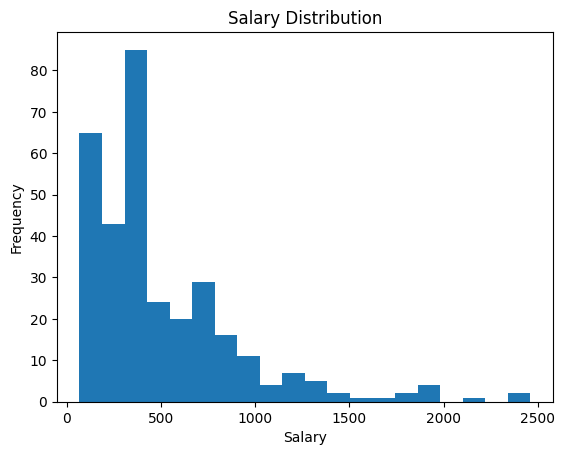

In [93]:
# Histogram for Salary
plt.hist(df['Salary'], bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

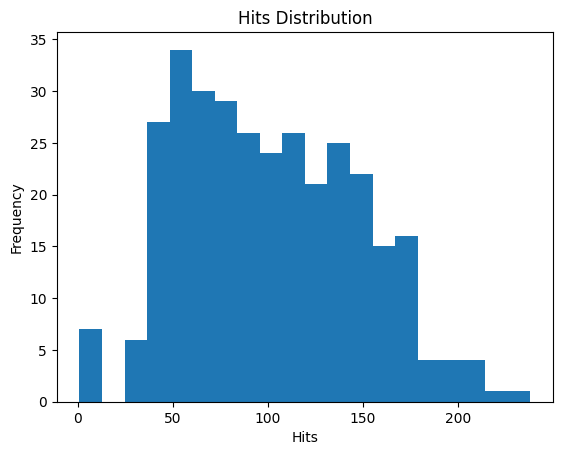

In [94]:
# Histogram for Hits
plt.hist(df['Hits'], bins=20)
plt.title('Hits Distribution')
plt.xlabel('Hits')
plt.ylabel('Frequency')
plt.show()

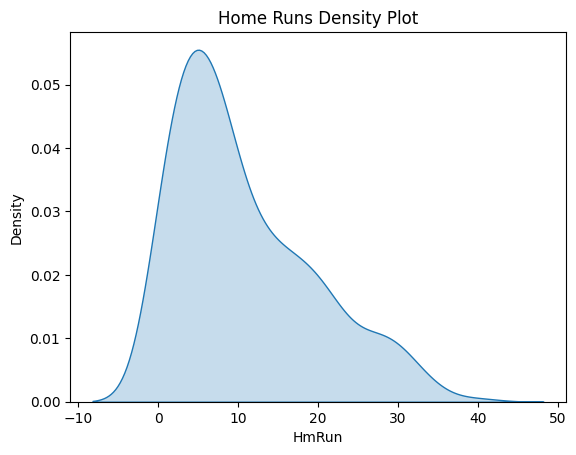

In [95]:
# Density plot for Home Runs
sns.kdeplot(df['HmRun'], fill=True)
plt.title('Home Runs Density Plot')
plt.show()

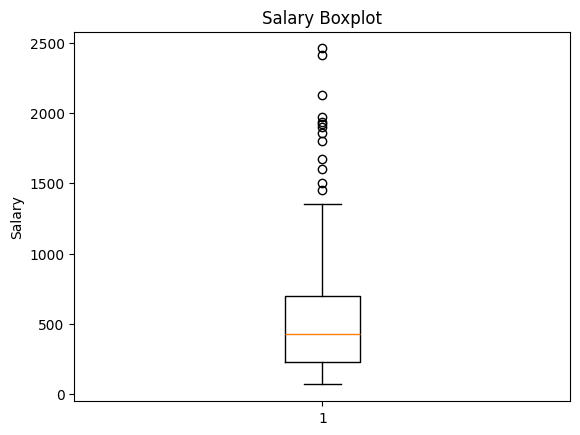

In [96]:
# Box plot for Salary
plt.boxplot(df['Salary'])
plt.title('Salary Boxplot')
plt.ylabel('Salary')
plt.show()

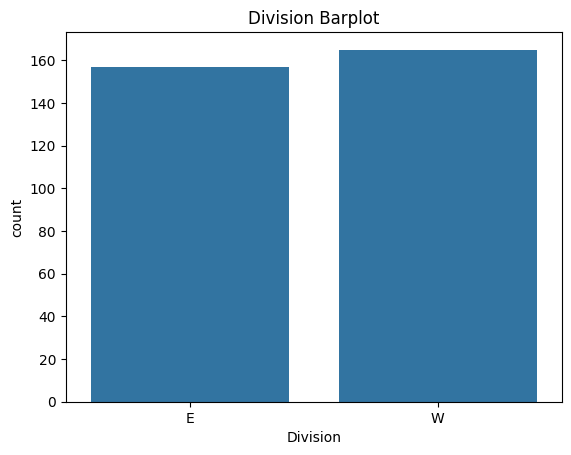

In [97]:
# Bar plot for 'Division'
sns.countplot(x='Division', data=df)
plt.title('Division Barplot')
plt.show()

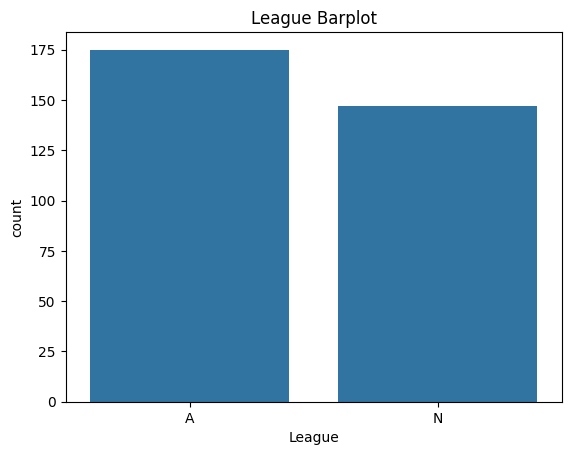

In [98]:
# Bar plot for 'League'
sns.countplot(x='League', data=df)
plt.title('League Barplot')
plt.show()

BIVARIATE ANALYSIS

In [99]:
# Creating a contingency table for 'Division' and 'League'
contingency_table = pd.crosstab(df['Division'], df['League'])
print(contingency_table)

League     A   N
Division        
E         85  72
W         90  75


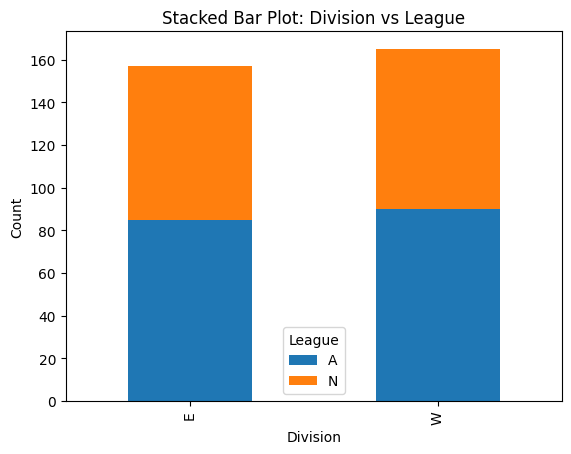

In [100]:
# Plotting a stacked bar chart using contingency table data
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Division vs League')
plt.xlabel('Division')
plt.ylabel('Count')
plt.show()

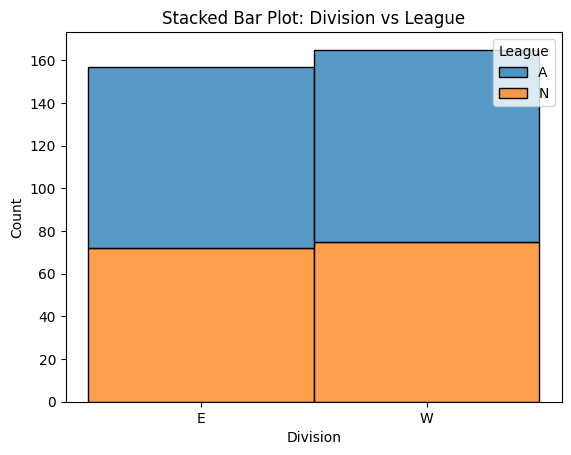

In [101]:
# Stacked bar plot with Seaborn (ggplot-like)
sns.histplot(df, x="Division", hue="League", multiple="stack")
plt.title('Stacked Bar Plot: Division vs League')
plt.show()

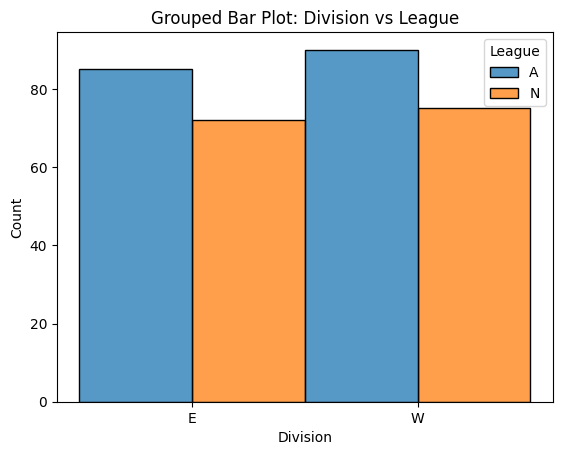

In [102]:
# Grouped (side-by-side) bar plot
sns.histplot(df, x="Division", hue="League", multiple="dodge")
plt.title('Grouped Bar Plot: Division vs League')
plt.show()

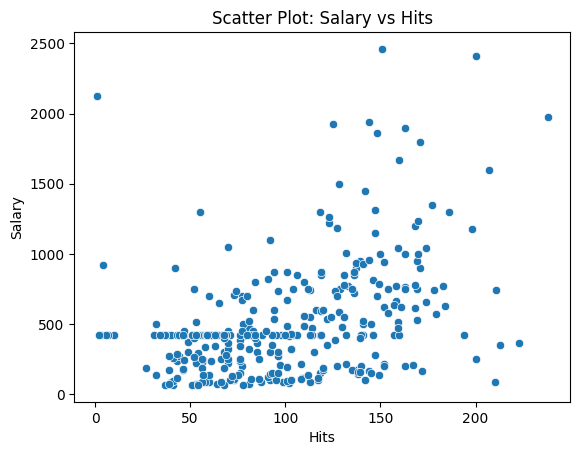

In [103]:
# Scatter plot for Salary vs Hits
sns.scatterplot(x='Hits', y='Salary', data=df)
plt.title('Scatter Plot: Salary vs Hits')
plt.show()

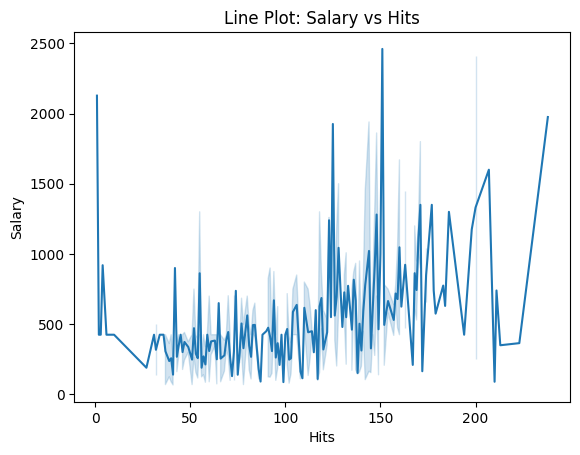

In [104]:
# Line plot for Salary vs Hits
sns.lineplot(x='Hits', y='Salary', data=df)
plt.title('Line Plot: Salary vs Hits')
plt.show()

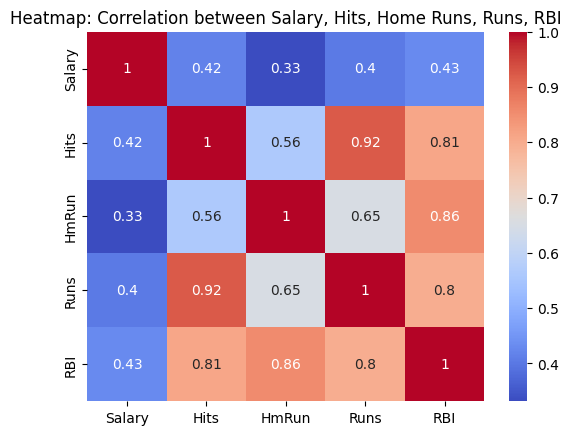

In [105]:
# Correlation heatmap for quantitative columns
quant_cols = ['Salary', 'Hits', 'HmRun', 'Runs', 'RBI']
sns.heatmap(df[quant_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Salary, Hits, Home Runs, Runs, RBI')
plt.show()

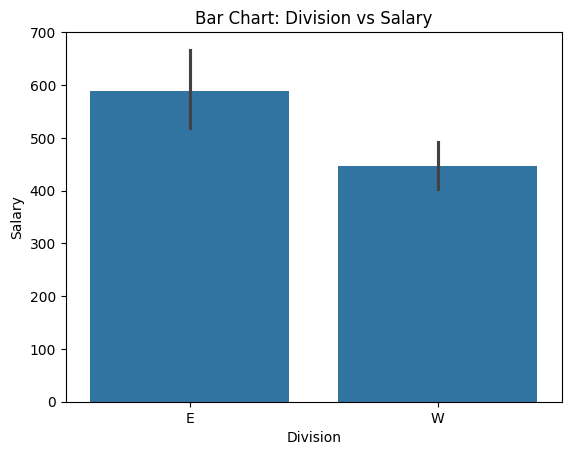

In [106]:
# Bar chart for Division vs Salary
sns.barplot(x='Division', y='Salary', data=df)
plt.title('Bar Chart: Division vs Salary')
plt.show()

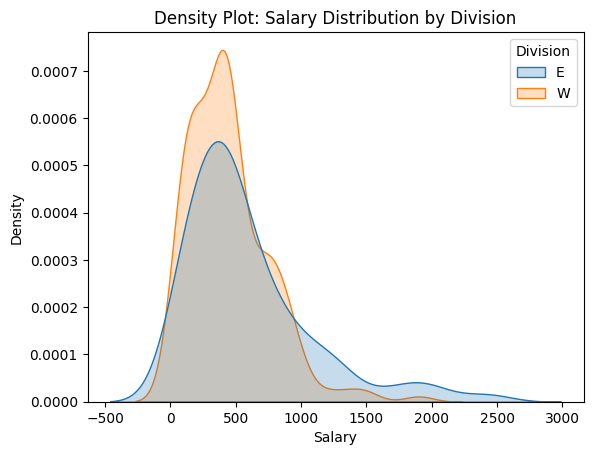

In [107]:
# Density plot for Salary with Division as hue
sns.kdeplot(x='Salary', hue='Division', data=df, fill=True)
plt.title('Density Plot: Salary Distribution by Division')
plt.show()

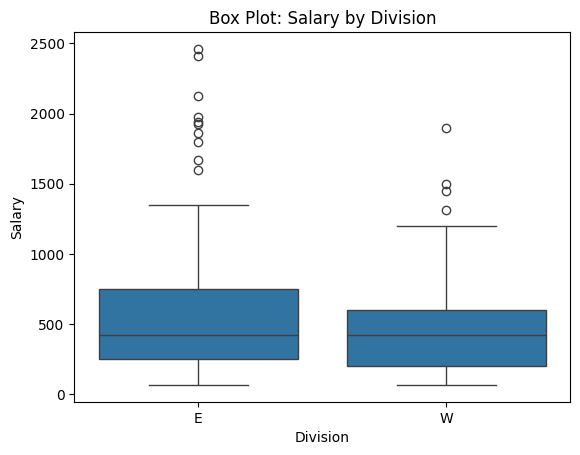

In [108]:
# Box plot for Salary across Divisions
sns.boxplot(x='Division', y='Salary', data=df)
plt.title('Box Plot: Salary by Division')
plt.show()

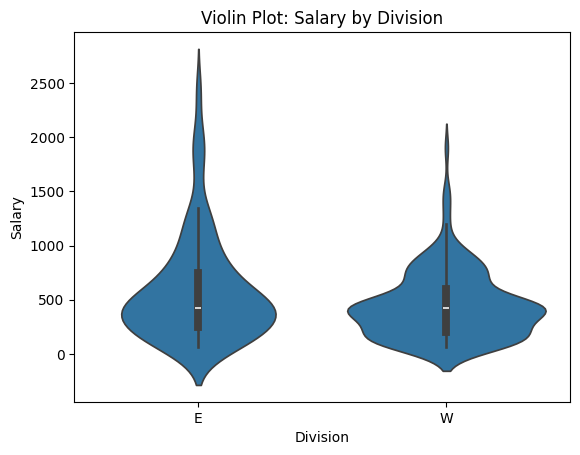

In [109]:
# Violin plot for Salary across Divisions
sns.violinplot(x='Division', y='Salary', data=df)
plt.title('Violin Plot: Salary by Division')
plt.show()

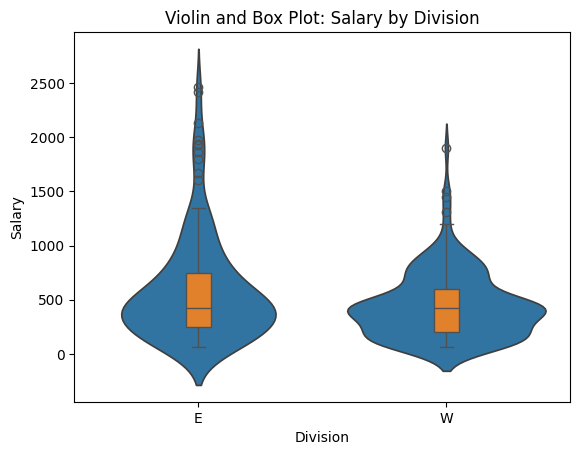

In [110]:
# Violin and Box plot combined
sns.violinplot(x='Division', y='Salary', data=df, inner=None)
sns.boxplot(x='Division', y='Salary', data=df, width=0.1)
plt.title('Violin and Box Plot: Salary by Division')
plt.show()

MULTIVARIATE ANALYSIS

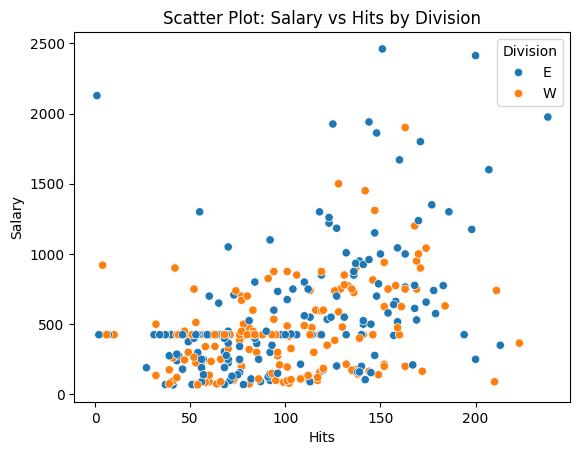

In [111]:
# Scatter plot with Division as color
sns.scatterplot(x='Hits', y='Salary', hue='Division', data=df)
plt.title('Scatter Plot: Salary vs Hits by Division')
plt.show()

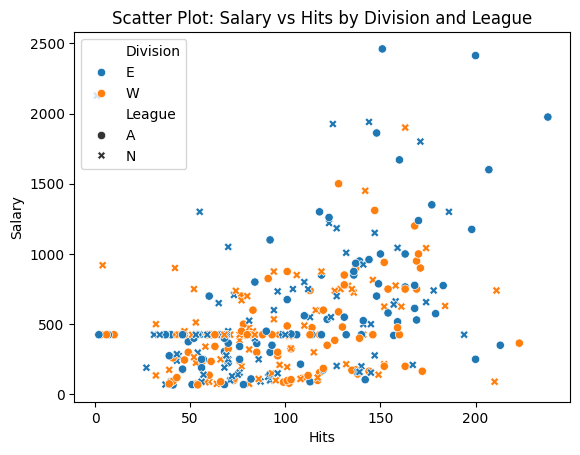

In [112]:
# Scatter plot with color for Division and shape for League
sns.scatterplot(x='Hits', y='Salary', hue='Division', style='League', data=df)
plt.title('Scatter Plot: Salary vs Hits by Division and League')
plt.show()

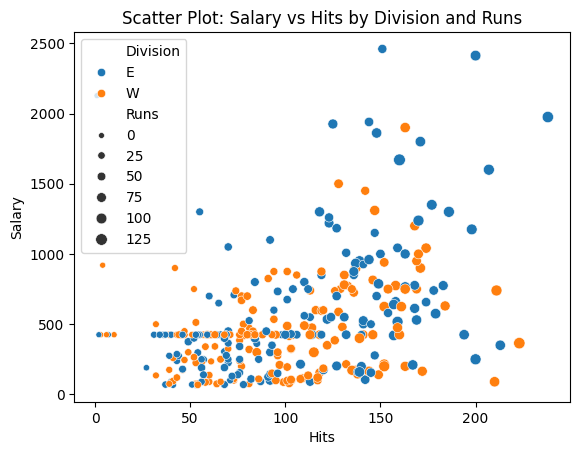

In [113]:
# Scatter plot with color for Division and size for Runs
sns.scatterplot(x='Hits', y='Salary', hue='Division', size='Runs', data=df)
plt.title('Scatter Plot: Salary vs Hits by Division and Runs')
plt.show()

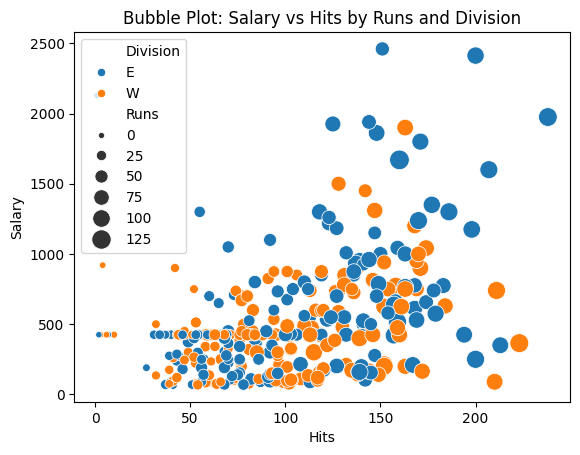

In [114]:
# Bubble plot using Salary vs Hits and Bubble size by Runs
sns.scatterplot(x='Hits', y='Salary', hue='Division', size='Runs', sizes=(20, 200), data=df)
plt.title('Bubble Plot: Salary vs Hits by Runs and Division')
plt.show()

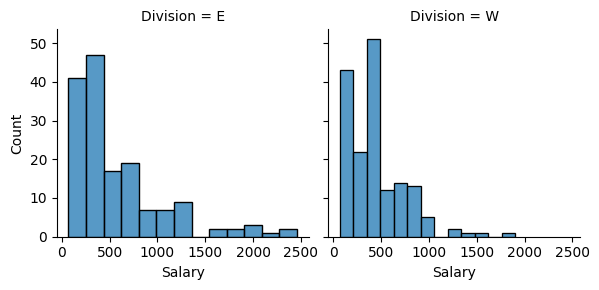

In [115]:
# Facet wrap for Salary distribution by Division
g = sns.FacetGrid(df, col="Division")
g.map(sns.histplot, "Salary")
plt.show()

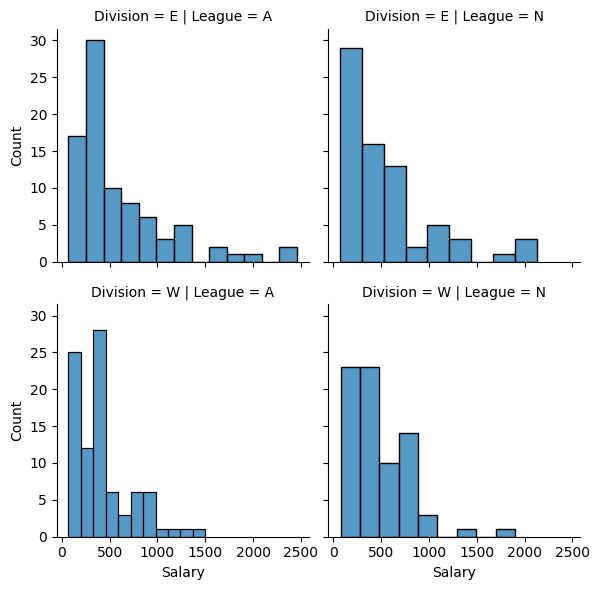

In [116]:
# Facet grid for Salary distribution by Division and League
g = sns.FacetGrid(df, row="Division", col="League")
g.map(sns.histplot, "Salary")
plt.show()

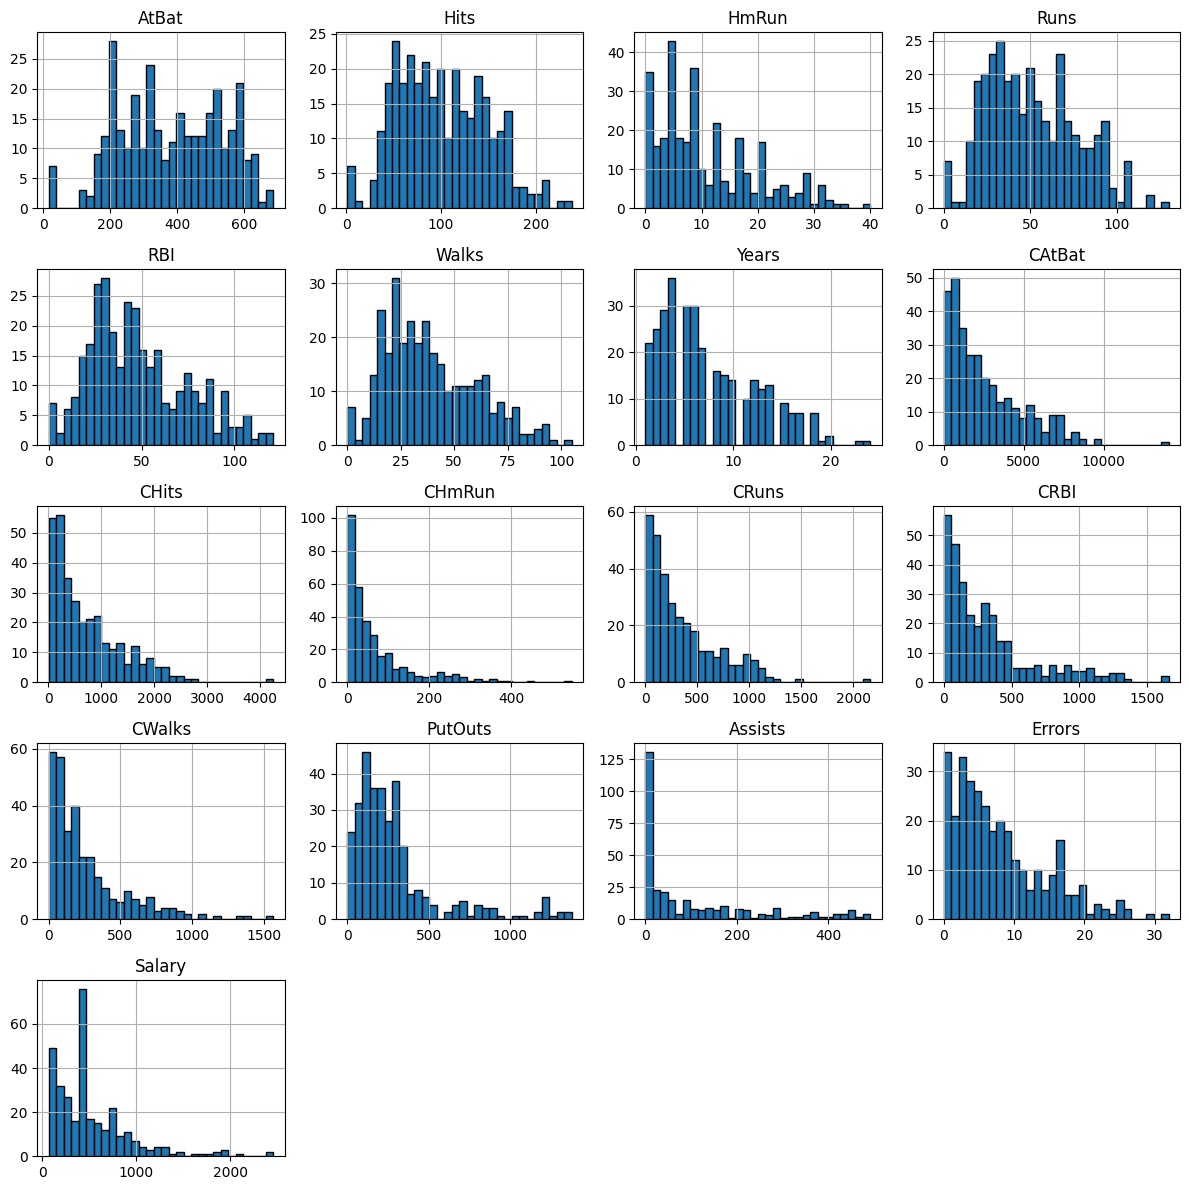

In [117]:
df.hist(figsize=(12, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

TIME SERIES ANALYSIS (COULDN'T FIND TIME SERIES)

In [118]:
# Sort data by 'Years' assuming we're using 'Years' as a time-based variable
df.sort_values('Years', inplace=True)

In [119]:
# Checking structure and data types
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 236
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AtBat          322 non-null    int64   
 1   Hits           322 non-null    int64   
 2   HmRun          322 non-null    int64   
 3   Runs           322 non-null    int64   
 4   RBI            322 non-null    int64   
 5   Walks          322 non-null    int64   
 6   Years          322 non-null    int64   
 7   CAtBat         322 non-null    int64   
 8   CHits          322 non-null    int64   
 9   CHmRun         322 non-null    int64   
 10  CRuns          322 non-null    int64   
 11  CRBI           322 non-null    int64   
 12  CWalks         322 non-null    int64   
 13  League         322 non-null    object  
 14  Division       322 non-null    object  
 15  PutOuts        322 non-null    int64   
 16  Assists        322 non-null    int64   
 17  Errors         322 non-null    int64   


In [120]:
# Simulating start and end dates based on the 'Years' column
start_year = df['Years'].min()
end_year = df['Years'].max()

print(f"Start Year: {start_year}, End Year: {end_year}")

Start Year: 1, End Year: 24


In [121]:
print(df[['Years', 'Salary']].describe())

            Years       Salary
count  322.000000   322.000000
mean     7.444099   515.600953
std      4.926087   409.817459
min      1.000000    67.500000
25%      4.000000   226.250000
50%      6.000000   425.000000
75%     11.000000   700.000000
max     24.000000  2460.000000


In [122]:
df = df.sort_values('Years')
print(df.head())

     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  ...  \
0      293    66      1    30   29     14      1     293     66       1  ...   
152    278    86      4    33   38     45      1     278     86       4  ...   
314    408   117     11    66   41     34      1     408    117      11  ...   
233    540   135     30    82   88     55      1     540    135      30  ...   
315    593   172     22    82  100     57      1     593    172      22  ...   

     CRBI  CWalks  League Division PutOuts  Assists  Errors  Salary  \
0      29      14       A        E     446       33      20   425.0   
152    38      45       N        W     102        4       2   110.0   
314    41      34       N        W     942       72      11   120.0   
233    88      55       A        W     157        6      14   172.0   
315   100      57       A        W    1222      139      15   165.0   

     NewLeague Salary_Binned  
0            A           Low  
152          N           Low  

In [123]:
# Treat 'Years' as a time index
df_time_series = df[['Years', 'Salary']].set_index('Years').asfreq('Y')

<ipython-input-123-7ad8e8019e22>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time_series = df[['Years', 'Salary']].set_index('Years').asfreq('Y')


ValueError: cannot reindex on an axis with duplicate labels

Exploratory Data Analysis for Structured Data - 1D

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
# 1. Measures of Central Tendency
mean_salary = df['Salary'].mean()  # Arithmetic mean
median_salary = df['Salary'].median()  # Median
quantiles_salary = df['Salary'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])  # Quantiles (10%, 25%, 50%, 75%, 90%)

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Quantiles for Salary:\n{quantiles_salary}")

Mean Salary: 515.6009534161491
Median Salary: 425.0
Quantiles for Salary:
0.10    110.00
0.25    226.25
0.50    425.00
0.75    700.00
0.90    996.00
Name: Salary, dtype: float64


In [125]:
# 2. Measures of Dispersion
range_salary = df['Salary'].max() - df['Salary'].min()  # Range
iqr_salary = stats.iqr(df['Salary'])  # Interquartile Range (IQR)
std_salary = df['Salary'].std()  # Standard Deviation
skewness_salary = skew(df['Salary'])  # Skewness
kurtosis_salary = kurtosis(df['Salary'])  # Kurtosis

print(f"Range of Salary: {range_salary}")
print(f"IQR of Salary: {iqr_salary}")
print(f"Standard Deviation of Salary: {std_salary}")
print(f"Skewness of Salary: {skewness_salary}")
print(f"Kurtosis of Salary: {kurtosis_salary}")

Range of Salary: 2392.5
IQR of Salary: 473.75
Standard Deviation of Salary: 409.8174589416264
Skewness of Salary: 1.8648712892543178
Kurtosis of Salary: 4.516137891843974


In [126]:
# 3. Frequency Distribution and Plots
# Frequency distribution
salary_counts = df['Salary'].value_counts().sort_index()
relative_freq = salary_counts / len(df)  # Relative frequency distribution
cumulative_freq = salary_counts.cumsum() / len(df)  # Cumulative frequency distribution

print(f"Frequency Distribution:\n{salary_counts}")
print(f"Relative Frequency Distribution:\n{relative_freq}")
print(f"Cumulative Frequency Distribution:\n{cumulative_freq}")

Frequency Distribution:
Salary
67.500      1
68.000      1
70.000      5
75.000      5
80.000      1
           ..
1940.000    1
1975.000    1
2127.333    1
2412.500    1
2460.000    1
Name: count, Length: 150, dtype: int64
Relative Frequency Distribution:
Salary
67.500      0.003106
68.000      0.003106
70.000      0.015528
75.000      0.015528
80.000      0.003106
              ...   
1940.000    0.003106
1975.000    0.003106
2127.333    0.003106
2412.500    0.003106
2460.000    0.003106
Name: count, Length: 150, dtype: float64
Cumulative Frequency Distribution:
Salary
67.500      0.003106
68.000      0.006211
70.000      0.021739
75.000      0.037267
80.000      0.040373
              ...   
1940.000    0.987578
1975.000    0.990683
2127.333    0.993789
2412.500    0.996894
2460.000    1.000000
Name: count, Length: 150, dtype: float64


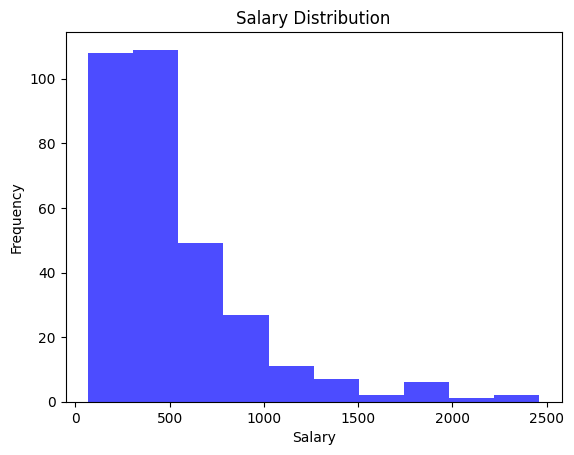

In [127]:
# Histogram
plt.hist(df['Salary'], bins=10, color='blue', alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

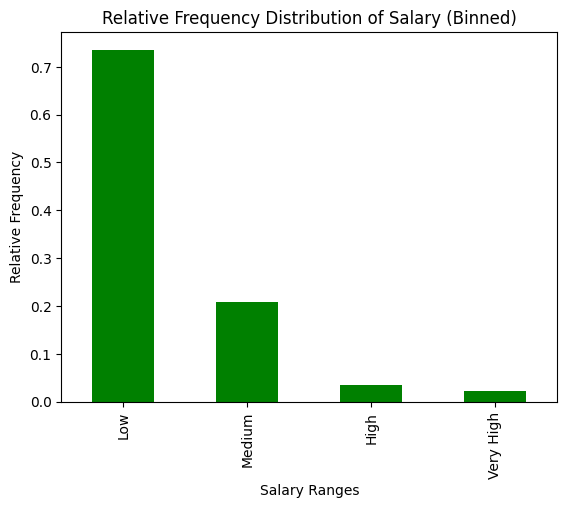

In [128]:
# Relative frequency plot
relative_freq = df['Salary_Binned'].value_counts(normalize=True).sort_index()
relative_freq.plot(kind='bar', color='green')
plt.title('Relative Frequency Distribution of Salary (Binned)')
plt.xlabel('Salary Ranges')
plt.ylabel('Relative Frequency')
plt.show()

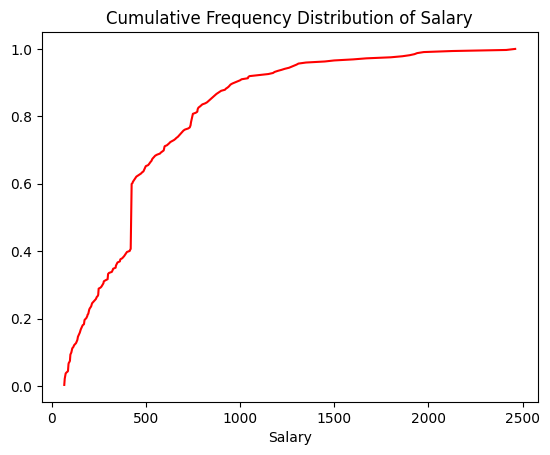

In [129]:
# Cumulative frequency plot
cumulative_freq.plot(kind='line', color='red')
plt.title('Cumulative Frequency Distribution of Salary')
plt.show()

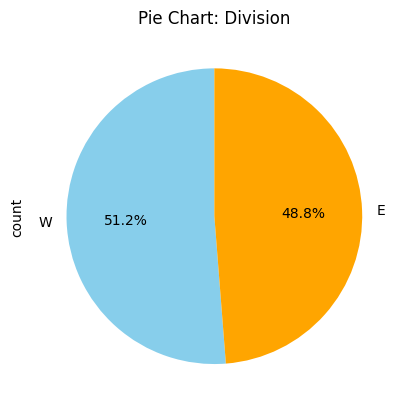

In [130]:
# 4. Pie Chart for Categorical Data (Division)
division_counts = df['Division'].value_counts()
division_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Pie Chart: Division')
plt.show()

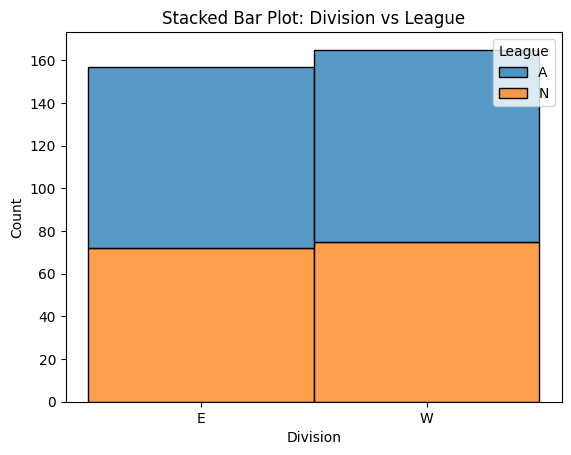

In [131]:
# Stacked Bar Plot for Categorical Data
sns.histplot(data=df, x='Division', hue='League', multiple='stack')
plt.title('Stacked Bar Plot: Division vs League')
plt.show()

Exploratory Data Analysis for Structured data - 2D Analysis

In [132]:
# 1. Contingency Table for Categorical vs Categorical
contingency_table_division_league = pd.crosstab(df['Division'], df['League'])
print(contingency_table_division_league)

League     A   N
Division        
E         85  72
W         90  75


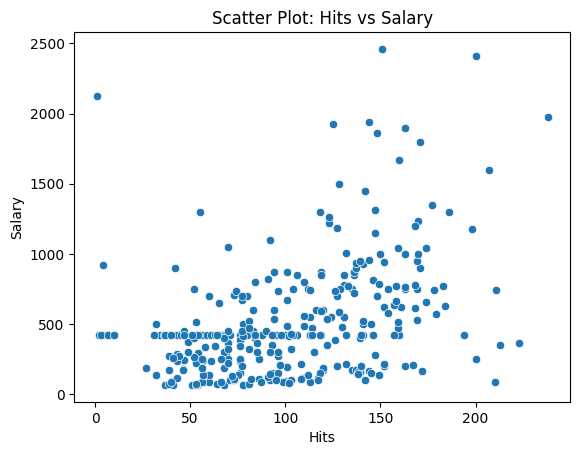

In [133]:
# 2. Scatter Plot for Numerical vs Numerical (Salary vs Hits)
sns.scatterplot(x='Hits', y='Salary', data=df)
plt.title('Scatter Plot: Hits vs Salary')
plt.show()

In [134]:
# 3. Contingency Table for Numerical vs Categorical
salary_by_division = pd.crosstab(df['Division'], df['Salary'])
print(salary_by_division)

Salary    67.500    68.000    70.000    75.000    80.000    86.500    \
Division                                                               
E                1         0         5         0         0         0   
W                0         1         0         5         1         1   

Salary    87.500    90.000    91.500    95.000    ...  1670.000  1800.000  \
Division                                          ...                       
E                0         3         1         0  ...         1         1   
W                1         3         0         1  ...         0         0   

Salary    1861.460  1900.000  1925.571  1940.000  1975.000  2127.333  \
Division                                                               
E                1         0         1         1         1         1   
W                0         1         0         0         0         0   

Salary    2412.500  2460.000  
Division                      
E                1         1  
W                0  

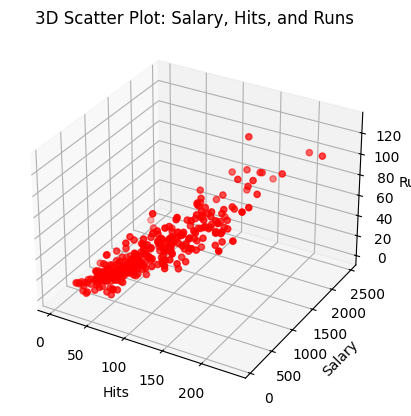

In [135]:
# 4. Multivariate 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hits'], df['Salary'], df['Runs'], c='r', marker='o')
ax.set_xlabel('Hits')
ax.set_ylabel('Salary')
ax.set_zlabel('Runs')
plt.title('3D Scatter Plot: Salary, Hits, and Runs')
plt.show()

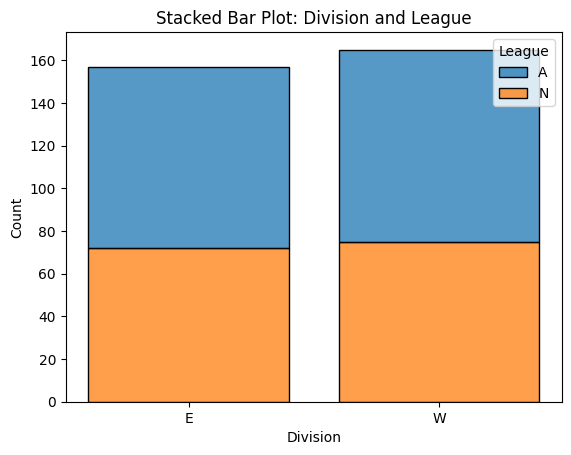

In [136]:
# 5. Stacked Bar Plot with additional formatting
sns.histplot(df, x="Division", hue="League", multiple="stack", shrink=0.8)
plt.title('Stacked Bar Plot: Division and League')
plt.xlabel('Division')
plt.ylabel('Count')
plt.show()

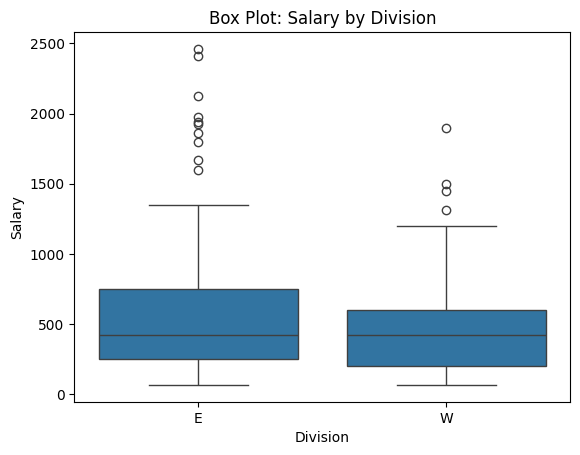

In [137]:
# 6. Boxplot for Numerical vs Categorical
sns.boxplot(x='Division', y='Salary', data=df)
plt.title('Box Plot: Salary by Division')
plt.show()


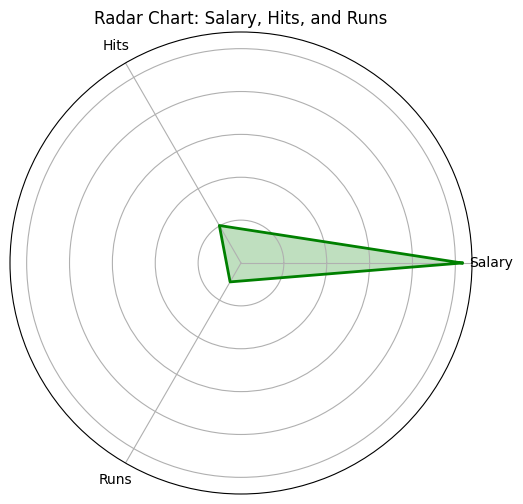

In [138]:
# 7. Radar Chart (Sunray Plot equivalent)
# Preparing a radar chart using salary, hits, and runs
categories = ['Salary', 'Hits', 'Runs']
df_radar = df[categories].mean().values
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

df_radar = np.concatenate((df_radar,[df_radar[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, df_radar, color='green', alpha=0.25)
ax.plot(angles, df_radar, color='green', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart: Salary, Hits, and Runs')
plt.show()

In [139]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Salary_Binned
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,425.0,A,Low
152,278,86,4,33,38,45,1,278,86,4,...,38,45,N,W,102,4,2,110.0,N,Low
314,408,117,11,66,41,34,1,408,117,11,...,41,34,N,W,942,72,11,120.0,N,Low
233,540,135,30,82,88,55,1,540,135,30,...,88,55,A,W,157,6,14,172.0,A,Low
315,593,172,22,82,100,57,1,593,172,22,...,100,57,A,W,1222,139,15,165.0,A,Low


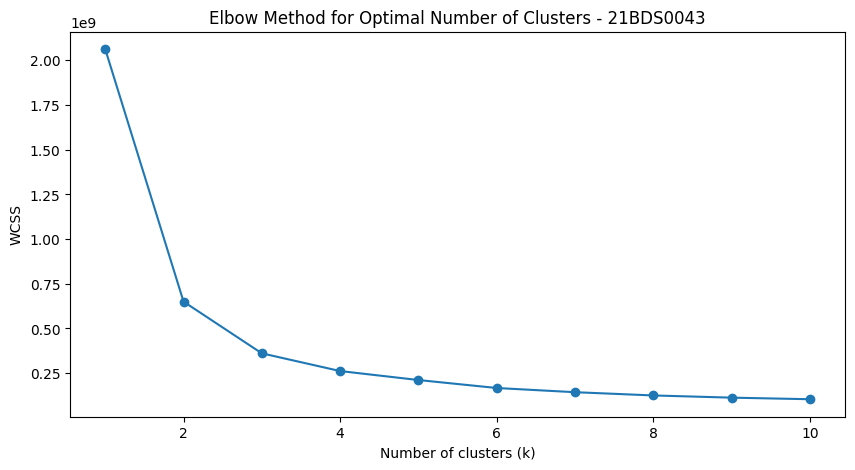

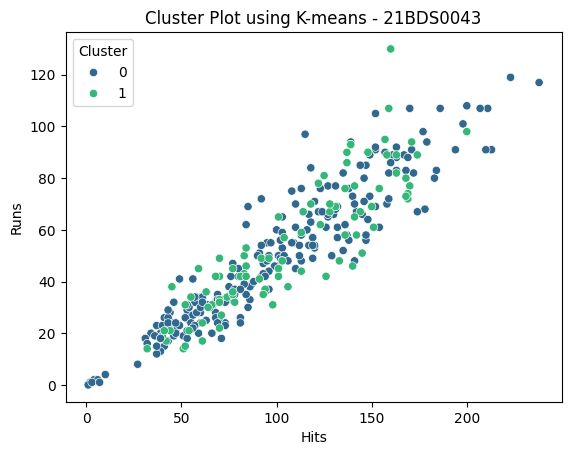

In [142]:
# Load necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical columns
for column in ['League', 'Division', 'NewLeague']:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

# Remove rows with missing values and duplicates
df = df.dropna().drop_duplicates()

# Exclude the "salary binned" column and non-numeric columns for clustering
df_clustering = df.drop(columns=['Salary_Binned'])

# Ensure we are only working with numeric data
df_clustering = df_clustering.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate WCSS for Different Values of k using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=43)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal Number of Clusters - 21BDS0043")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Step 3: Choose the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=43)
cluster_labels = kmeans.fit_predict(df_clustering)

# Add the cluster labels to the original dataframe (df)
df['Cluster'] = cluster_labels

# Step 4: Visualize the Clusters
sns.scatterplot(data=df, x='Hits', y='Runs', hue='Cluster', palette='viridis')
plt.title("Cluster Plot using K-means - 21BDS0043")
plt.xlabel("Hits")
plt.ylabel("Runs")
plt.show()


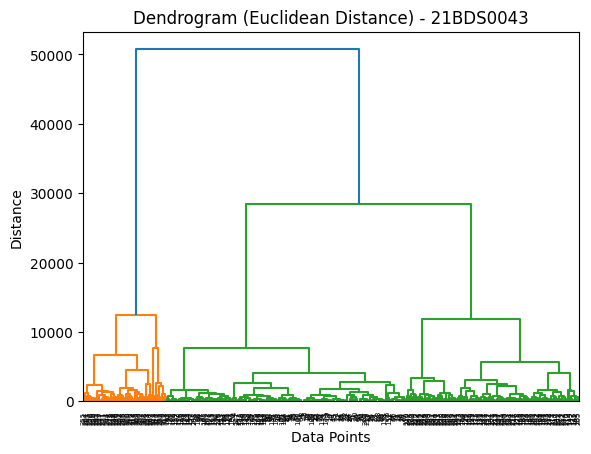

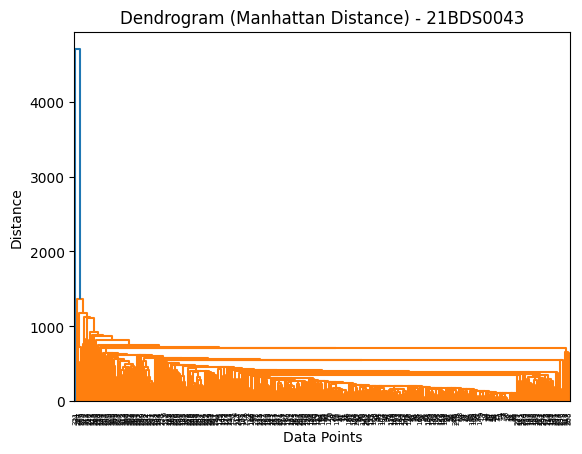

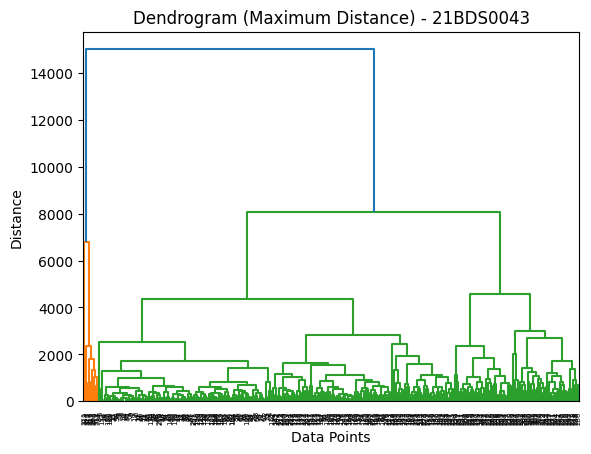

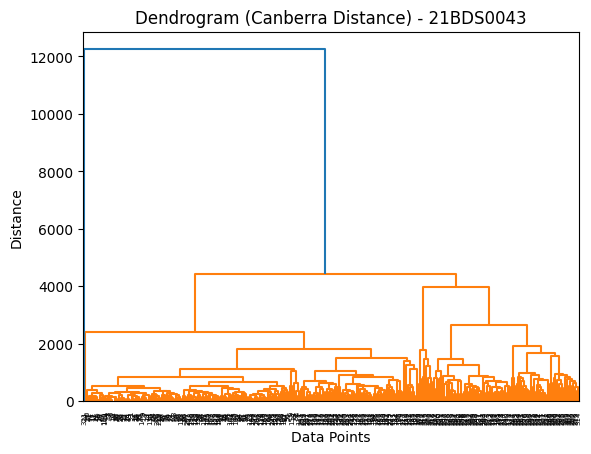

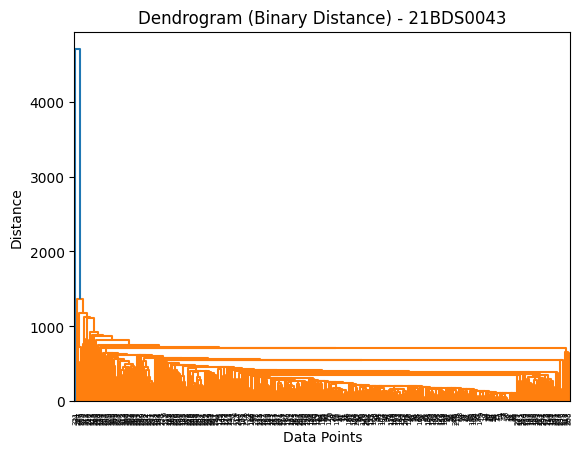

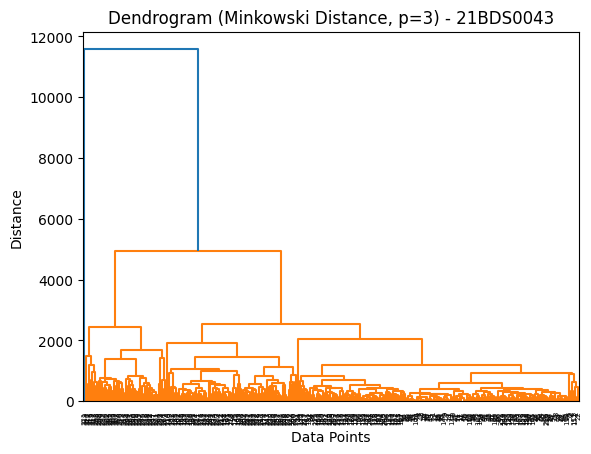

In [145]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Hierarchical Clustering with Various Distance Metrics
def plot_dendrogram(df, method, title):
    dendrogram = sch.dendrogram(sch.linkage(df, method=method))
    plt.title(f"{title} - 21BDS0043")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# 1. Euclidean Distance (Ward's Method)
plot_dendrogram(df_clustering, method='ward', title="Dendrogram (Euclidean Distance)")

# 2. Manhattan Distance (Single Linkage Method)
plot_dendrogram(df_clustering, method='single', title="Dendrogram (Manhattan Distance)")

# 3. Maximum Distance (Complete Linkage Method)
plot_dendrogram(df_clustering, method='complete', title="Dendrogram (Maximum Distance)")

# 4. Canberra Distance (Average Linkage Method)
plot_dendrogram(df_clustering, method='average', title="Dendrogram (Canberra Distance)")

# 5. Binary Distance (Single Linkage Method)
plot_dendrogram(df_clustering, method='single', title="Dendrogram (Binary Distance)")

# 6. Minkowski Distance (with p=3, Average Linkage Method)
from scipy.spatial.distance import pdist, squareform
minkowski_dist = pdist(df_clustering, metric='minkowski', p=3)
minkowski_linkage = sch.linkage(minkowski_dist, method='average')
sch.dendrogram(minkowski_linkage)
plt.title("Dendrogram (Minkowski Distance, p=3) - 21BDS0043")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

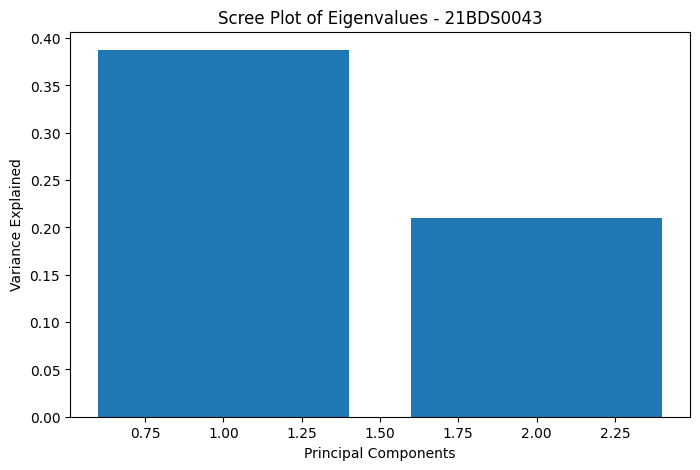

In [143]:
# Step 5: Perform PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Scree Plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title("Scree Plot of Eigenvalues - 21BDS0043")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.show()
